In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 读取鸢尾花数据集，header参数指定标题的行，默认为0，如果没有标题则使用None
data = pd.read_csv(r'data/iris.csv', header=0)

# 抽取头部数据，默认5条
# data.head()
# 抽取末尾数据，默认5条
# data.tail()
#随机抽取样本，默认一条
# data.sample(5)

# 将类别文本映射为数值类型
data['Species'] = data['Species'].map({'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2})

# 删除不需要的Id列
data.drop('Id', axis=1, inplace=True)

# 检验数据集中是否有重复记录
# data.duplicated().any()
# 删除数据集中的重复记录
data.drop_duplicates(inplace=True)
# 查看不同类别的鸢尾花各有多少条记录
data['Species'].value_counts()

2    50
1    49
0    48
Name: Species, dtype: int64

In [18]:
class KNN:
    # 初始化方法
    def __init__(self, k):
        self.k = k
    
    
    # 训练方法
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        

    # 预测方法
    def predict(self, X):
        X = np.asarray(X)
        result = []
        # 对nparray进行遍历，每次取数组中的一行进行运算（数组之间对位运算）
        for x in X:
            # 对于测试集中的每一个样本，依次与训练集中的所有样本求欧氏距离
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            # 返回数组排序后，每个元素在原数组（排序之前的数组）中的索引
            index = dis.argsort()
            # 进行截断，只取前k个元素，取距离最近的k个元素的索引
            index = index[:self.k]
            # 返回数组中每个元素出现的次数，元素必须是非负的整数
            count = np.bincount(self.y[index])
            # 考虑权重
            # count = np.bincount(self.y[index], weights= 1 / dis[index])
            # 返回nparray数组中，值最大的元素对应的索引，该索引就是判定的类别
            # 最大元素索引，就是出现次数最多的元素
            result.append(count.argmax())
        return np.asarray(result)

In [19]:
# 提取每个类别的鸢尾花数据
t0 = data[data['Species'] == 0]
t1 = data[data['Species'] == 1]
t2 = data[data['Species'] == 2]
# 对每个类别数据进行洗牌
t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
# 构建训练集与测试集
train_X = pd.concat([t0.iloc[:40, :-1], t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:40, -1], t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t0.iloc[40:, :-1], t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1], t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

# 创建KNN对象，进行训练和测试
knn = KNN(k=3)
# 进行训练
knn.fit(train_X, train_y)
# 进行测试，获得测试结果
result = knn.predict(test_X)
# 计算测试正确率
# display(result)
# display(test_y)
display(np.sum(result == test_y) / len(test_y))

0.9629629629629629

In [38]:
# 设置matplotlib支持中文
mpl.rcParams['font.family'] = 'SimHei'
# 设置在中文字体时，能够正常显示负号(-)
mpl.rcParams['axes.unicode_minus'] = False

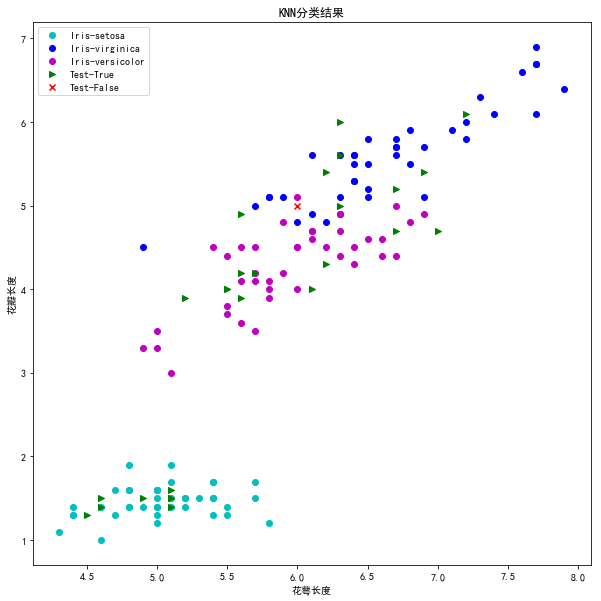

In [41]:
# {'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2}
# 设置图表大小
plt.figure(figsize=(10, 10))
# 绘制训练集数据
plt.scatter(x=t0['SepalLengthCm'][:40], y=t0['PetalLengthCm'][:40], color='c', label='Iris-setosa')
plt.scatter(x=t1['SepalLengthCm'][:40], y=t1['PetalLengthCm'][:40], color='b', label='Iris-virginica')
plt.scatter(x=t2['SepalLengthCm'][:40], y=t2['PetalLengthCm'][:40], color='m', label='Iris-versicolor')
# 绘制测试集数据
test_true = test_X[result == test_y]
test_false = test_X[result != test_y]
plt.scatter(x=test_true['SepalLengthCm'], y=test_true['PetalLengthCm'], color='g', marker='>', label='Test-True')
plt.scatter(x=test_false['SepalLengthCm'], y=test_false['PetalLengthCm'], color='r', marker='x', label='Test-False')
# 图表进行设置

plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('KNN分类结果')
plt.legend(loc='best')
plt.show()